In [98]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

In [99]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
	
	return data

In [100]:
def convert_dict_to_list(input_dict):
	result = []
	for key, value in input_dict.items():
		a, b = key.split(':')
		tuple_key = (int(a), int(b))
		result.append((tuple_key, value))
	
	return result

In [101]:
def sort_list(input_list, index, descend=True):
		return sorted(input_list, key=lambda x: x[1][index], reverse=descend)

In [102]:
def extract_element_list(data_list, index):
		if index > 1:
				first_elements = [item[1][index - 2] for item in data_list]
		else:
				first_elements = [item[0][index] for item in data_list]
		return first_elements

In [103]:
def find_frontier(a_list, b_list):
		"""
		Filter elements from two lists based on the condition that an element 'bn' in b_list should not be greater
		than any subsequent element in b_list.

		Args:
		a_list (list): List of sorted elements [a1, a2, ..., an].
		b_list (list): Corresponding list [b1, b2, ..., bn].

		Returns:
		tuple: Two lists filtered according to the specified condition.
		"""
		filtered_a = []
		filtered_b = []
		
		for i in range(len(b_list)):
				if all(b_list[i] <= b_list[j] for j in range(i + 1, len(b_list))):
						filtered_a.append(a_list[i])
						filtered_b.append(b_list[i])
		
		return filtered_a, filtered_b

In [104]:
def plot_one_line(xs, ys, x_label, y_label, title, label_size=28, font_size=32):
	fig, ax1 = plt.subplots(figsize=(12, 6))

	ax1.plot(xs, ys, color='red', marker='o')  # 'o' denotes the marker type
	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	ax1.set_title(title, fontsize=font_size)
	ax1.tick_params(axis='both', labelsize=label_size)
	plt.grid(True)

	plt.show()

In [105]:
def plot_one_fitted_curve(xs, ys, x_label, y_label, title, label_size=28, font_size=32, legend_size=24):
		x = np.array(xs)
		y = np.array(ys)

		# Perform a polynomial fit of degree 2 (quadratic)
		coefficients = np.polyfit(x, y, 2)

		# Create a polynomial function from the coefficients
		polynomial = np.poly1d(coefficients)

		# Generate x values for plotting the curve
		x_fit = np.linspace(x.min(), x.max(), 50)

		# Evaluate the polynomial function for x_fit
		y_fit = polynomial(x_fit)

		plt.figure(figsize=(12, 8))
		plt.scatter(x, y, color='blue', label='Profiling Results')
		plt.plot(x_fit, y_fit, 'r-', label='Fitting Curve')
		plt.title(title, fontsize=font_size)
		plt.xlabel(x_label, fontsize=font_size)
		plt.ylabel(y_label, fontsize=font_size)
		plt.xticks(fontsize=label_size)
		plt.yticks(fontsize=label_size)  
		plt.legend(fontsize=legend_size)
		plt.grid(True)
		
		plt.show()


In [106]:
def plot_one_fitted_curve_with_points(xs, ys, x_points, y_points, y_buffer, x_label, y_label, title, label_size=28, font_size=32, legend_size=24):
		x = np.array(xs)
		y = np.array(ys)
		x_points = np.array(x_points)
		y_points = np.array(y_points)

		y_adjusted = y - (y_buffer * (y.max() - y.min()))

		# Perform a polynomial fit of degree 2 (quadratic)
		coefficients = np.polyfit(x, y_adjusted, 2)

		# Create a polynomial function from the coefficients
		polynomial = np.poly1d(coefficients)

		# Generate x values for plotting the curve
		x_fit = np.linspace(x.min(), x.max(), 50)

		# Evaluate the polynomial function for x_fit
		y_fit = polynomial(x_fit)

		plt.figure(figsize=(12, 8))
		plt.scatter(x_points, y_points, color='blue', label='Profiling Results')
		plt.plot(x_fit, y_fit, 'r-', label='Frontier')
		plt.title(title, fontsize=font_size)
		plt.xlabel(x_label, fontsize=font_size)
		plt.ylabel(y_label, fontsize=font_size)
		plt.xticks(fontsize=label_size)
		plt.yticks(fontsize=label_size)
		plt.legend(fontsize=legend_size)
		plt.grid(True)
		
		plt.show()

In [107]:
def find_round_frontier(xs, ys):
	frontier_dict = {}
	for i in range(len(xs)):
		x = xs[i]
		y = ys[i]
		if (round(x) not in frontier_dict) or ( (round(x) in frontier_dict) and (y < frontier_dict[round(x)]) ):
			frontier_dict[round(x)] = y
	
	return frontier_dict

In [108]:
def plot_one_curve_with_points(xs, ys, x_points, y_points, x_label, y_label, title, label_size=28, font_size=32, legend_size=24, line_width=4):
		plt.figure(figsize=(12, 8))
		plt.scatter(x_points, y_points, color='blue', label='Profiling Results')
		plt.plot(xs, ys, 'r-', label='Optimal Frequency Frontier', linewidth=line_width)
		# plt.title(title, fontsize=font_size)
		plt.xlabel(x_label, fontsize=font_size)
		plt.ylabel(y_label, fontsize=font_size)
		plt.xticks(fontsize=label_size)
		plt.yticks(fontsize=label_size)
		plt.legend(fontsize=legend_size)
		plt.grid(True)
		
		plt.show()

In [109]:
def round_floats_to_sigfigs(input_list, sigfigs):
	return [round(number, sigfigs) for number in input_list]

In [110]:
NUM_FRAME = 1800
ENERGY_SCALE = 10**6

result_dict = load_json('../assets/result/energy/YOLOv8-1800-960.json')
sorted_result_list = sort_list(convert_dict_to_list(result_dict), 0)
fps_list = list(NUM_FRAME / np.array(extract_element_list(sorted_result_list, 2)))
gpu_unit_energy_list = list(np.array(extract_element_list(sorted_result_list, 3)) / np.array(extract_element_list(sorted_result_list, 2)) / ENERGY_SCALE)
cpu_unit_energy_list = list(np.array(extract_element_list(sorted_result_list, 4)) / np.array(extract_element_list(sorted_result_list, 2)) / ENERGY_SCALE)
total_unit_energy_list = list(np.array(gpu_unit_energy_list) + np.array(cpu_unit_energy_list))

fps_frontier, unit_energy_frontier = find_frontier(fps_list, total_unit_energy_list)

In [111]:
# plot_one_fitted_curve(fps_frontier, unit_energy_frontier, 'Throughput (FPS)', 'Power (W)', 'Object Detection Profiling Result')

In [112]:
# plot_one_fitted_curve_with_points(fps_frontier, unit_energy_frontier, fps_list, total_unit_energy_list, .0, 'Throughput (FPS)', 'Power (W)', 'Object Detection Profiling Result')

In [113]:
# frontier_dict = find_round_frontier(fps_list, total_unit_energy_list)
# frontier_dict_fps, frontier_dict_unit_energy = sorted(list(frontier_dict.keys())), [frontier_dict[round_fps] for round_fps in sorted(list(frontier_dict.keys()))]
# plot_one_curve_with_points(frontier_dict_fps, frontier_dict_unit_energy, fps_list, total_unit_energy_list, 'Throughput (FPS)', 'Average Power (W)', 'Object Detection Profiling Result')

In [114]:
# with open(('../assets/result/energy/Dict-Per-Real-Second-Throughput-960.json'), 'w') as file:
# 	json.dump(frontier_dict, file, indent=4)

In [115]:
NUM_FRAME = 1800
ENERGY_SCALE = 10**6
CPU_FREQUENCY_SCALE = 10**6
GPU_FREQUENCY_SCALE = 10**9

# result_dict = load_json('../assets/result/energy/YOLOv8-1800-960x480.json')
sorted_result_list = sort_list(convert_dict_to_list(result_dict), 0)
# fps_list = list(NUM_FRAME / np.array(extract_element_list(sorted_result_list, 2)))
# gpu_unit_energy_list = list(np.array(extract_element_list(sorted_result_list, 3)) / np.array(extract_element_list(sorted_result_list, 2)) / ENERGY_SCALE)
# cpu_unit_energy_list = list(np.array(extract_element_list(sorted_result_list, 4)) / np.array(extract_element_list(sorted_result_list, 2)) / ENERGY_SCALE)
# total_unit_energy_list = list(np.array(gpu_unit_energy_list) + np.array(cpu_unit_energy_list))

# cpu_frequency_list = list(np.array(extract_element_list(sorted_result_list, 0)) / CPU_FREQUENCY_SCALE)
# gpu_frequency_list = list(np.array(extract_element_list(sorted_result_list, 1)) / GPU_FREQUENCY_SCALE)

pure_cpu_frequency_set = sorted(list(set(extract_element_list(sorted_result_list, 0))))
pure_gpu_frequency_set = sorted(list(set(extract_element_list(sorted_result_list, 1))))

fps_table = []
total_power_table = []
for gpu_freq in pure_gpu_frequency_set:
	fps_row = []
	total_power_row = []
	for cpu_freq in pure_cpu_frequency_set:
		single_performance = result_dict[f"{cpu_freq}:{gpu_freq}"]
		fps_row.append(NUM_FRAME / single_performance[0])
		total_power_row.append((single_performance[1] + single_performance[2]) / single_performance[0] / ENERGY_SCALE)
	fps_table.append(fps_row)
	total_power_table.append(total_power_row)


cpu_x_axis = round_floats_to_sigfigs(list(np.array(pure_cpu_frequency_set) / CPU_FREQUENCY_SCALE), 2)
gpu_x_axis = round_floats_to_sigfigs(list(np.array(pure_gpu_frequency_set) / GPU_FREQUENCY_SCALE), 2)

In [116]:
def plot_heatmap(data, x_axis, y_axis, title, x_label, y_label, z_label, z_tick_interval, label_size=28, tick_size=24, x_tick_interval=4, y_tick_interval=2):
	# Convert data to a NumPy array for better handling with Matplotlib
	data = np.array(data)

	# Create the plot
	plt.figure(figsize=(14, 8))
	c = plt.imshow(data, aspect='auto', cmap='viridis', origin='lower', interpolation='none')

	# Adjust x and y ticks
	plt.xticks(ticks=np.arange(0, len(x_axis), x_tick_interval), labels=x_axis[::x_tick_interval], fontsize=tick_size)
	plt.yticks(ticks=np.arange(0, len(y_axis), y_tick_interval), labels=y_axis[::y_tick_interval], fontsize=tick_size)

	# Adding a color bar to show the mapping of data values to colors
	cb = plt.colorbar(c)
	z_min, z_max = np.floor(data.min()), np.ceil(data.max())
	cb.set_ticks(np.arange(z_min, z_max + 1, z_tick_interval))  # Set ticks at every integer interval
	cb.set_label(z_label, fontsize=label_size)  # Add label to the color bar and set font size
	cb.ax.tick_params(labelsize=tick_size)
	plt.xlabel(x_label, fontsize=label_size)
	plt.ylabel(y_label, fontsize=label_size)
	# plt.title(title, fontsize=label_size)
	plt.show()

In [117]:
# plot_heatmap(total_power_table, cpu_x_axis, gpu_x_axis, 'Average Power vs Hardware Frequency', 'CPU Frequency (GHz)', 'GPU Frequency (GHz)', 'Average Power (W)', 1)
# plot_heatmap(fps_table, cpu_x_axis, gpu_x_axis, 'Detection Throughput vs Hardware Frequency', 'CPU Frequency (GHz)', 'GPU Frequency (GHz)', 'Throughput (FPS)', 2)

In [118]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import griddata

# # Assuming these lists are already defined:
# x = cpu_frequency_list
# y = gpu_frequency_list
# z = total_unit_energy_list

# # Convert lists to NumPy arrays
# x = np.array(x)
# y = np.array(y)
# z = np.array(z)

# # Create a finer grid
# xi = np.linspace(x.min(), x.max(), 200)  # increased from 100 to 200
# yi = np.linspace(y.min(), y.max(), 200)  # increased from 100 to 200
# xi, yi = np.meshgrid(xi, yi)

# # Interpolate z values on this grid
# try:
#     zi = griddata((x, y), z, (xi, yi), method='cubic')  # try cubic for smoother results
# except Exception as e:
#     print(f"Error during interpolation: {e}")
#     zi = griddata((x, y), z, (xi, yi), method='nearest')  # Fallback method

# # Plotting the heatmap
# plt.figure(figsize=(14, 6))
# plt.contourf(xi, yi, zi, levels=50, cmap="viridis")  # increased levels from 15 to 50
# plt.colorbar()  # To show the scale
# plt.title("Heatmap of z values over x and y")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()


In [119]:
def plot_heatmap_with_marker(data, x_axis, y_axis, marker_points, title, x_label, y_label, z_label, z_tick_interval, label_size=28, tick_size=24, x_tick_interval=4, y_tick_interval=2):
	# Convert data to a NumPy array for better handling with Matplotlib
	data = np.array(data)

	# Create the plot
	plt.figure(figsize=(14, 8))
	c = plt.imshow(data, aspect='auto', cmap='viridis', origin='lower', interpolation='none')

	# Adjust x and y ticks
	plt.xticks(ticks=np.arange(0, len(x_axis), x_tick_interval), labels=x_axis[::x_tick_interval], fontsize=tick_size)
	plt.yticks(ticks=np.arange(0, len(y_axis), y_tick_interval), labels=y_axis[::y_tick_interval], fontsize=tick_size)

	# # Mark special points with a different marker
	# for xx, yy in marker_points:
	# 	# Convert x, y values to index positions using a tolerance
	# 	x_index = np.where(np.isclose(x_axis, xx, atol=1e-2))[0][0]
	# 	y_index = np.where(np.isclose(y_axis, yy, atol=1e-2))[0][0]
	# 	# Place a marker at the found index positions
	# 	plt.scatter(x_index, y_index, color='red', marker='x', s=200)  # 's' is the size of the marker

	# Adding a color bar to show the mapping of data values to colors
	cb = plt.colorbar(c)
	z_min, z_max = np.floor(data.min()), np.ceil(data.max())
	cb.set_ticks(np.arange(z_min, z_max + 1, z_tick_interval))  # Set ticks at every integer interval
	cb.set_label(z_label, fontsize=label_size)  # Add label to the color bar and set font size
	cb.ax.tick_params(labelsize=tick_size)
	plt.xlabel(x_label, fontsize=label_size)
	plt.ylabel(y_label, fontsize=label_size)
	# plt.title(title, fontsize=label_size)
	plt.show()

In [120]:
def find_round_frontier_from_result(result_list):
	frontier_dict = {}
	for i in range(len(result_list)):
		x = round(NUM_FRAME / result_list[i][1][0])
		y = result_list[i]
		
		if x not in frontier_dict:
			frontier_dict[x] = y
		else:
			curr_power = (y[1][1] + y[1][2]) / y[1][0] / ENERGY_SCALE
			curr_min_power = (frontier_dict[x][1][1] + frontier_dict[x][1][2]) / frontier_dict[x][1][0] / ENERGY_SCALE

			if curr_power < curr_min_power:
				frontier_dict[x] = y
	
	return frontier_dict

In [121]:
full_frontier_dict = find_round_frontier_from_result(sorted_result_list)
frontier_frequency_combination_dict = [(round(value[0][0] / CPU_FREQUENCY_SCALE, 2), round(value[0][1] / GPU_FREQUENCY_SCALE, 2)) for value in list(full_frontier_dict.values())]

In [122]:
# plot_heatmap_with_marker(total_power_table, cpu_x_axis, gpu_x_axis, frontier_frequency_combination_dict, 'Average Power vs Hardware Frequency', 'CPU Frequency (GHz)', 'GPU Frequency (GHz)', 'Average Power (W)', 1)
# plot_heatmap_with_marker(fps_table, cpu_x_axis, gpu_x_axis, frontier_frequency_combination_dict, 'Detection Throughput vs Hardware Frequency', 'CPU Frequency (GHz)', 'GPU Frequency (GHz)', 'Throughput (FPS)', 2)

In [123]:
efficiency_table = []
for gpu_freq in pure_gpu_frequency_set:
	efficiency_row = []
	for cpu_freq in pure_cpu_frequency_set:
		single_performance = result_dict[f"{cpu_freq}:{gpu_freq}"]
		rounded_fps = round(NUM_FRAME / single_performance[0])
		curr_power = single_performance[1] / single_performance[0] / CPU_FREQUENCY_SCALE + single_performance[2] / single_performance[0] / GPU_FREQUENCY_SCALE
		min_power = full_frontier_dict[rounded_fps][1][1] / full_frontier_dict[rounded_fps][1][0] / CPU_FREQUENCY_SCALE + full_frontier_dict[rounded_fps][1][2] / full_frontier_dict[rounded_fps][1][0] / GPU_FREQUENCY_SCALE
		single_efficiency = abs(curr_power - min_power) / (0.5*(curr_power + min_power))
		efficiency_row.append(single_efficiency)
	efficiency_table.append(efficiency_row)

efficiency_table_100 = (np.array(efficiency_table) * 100).tolist()

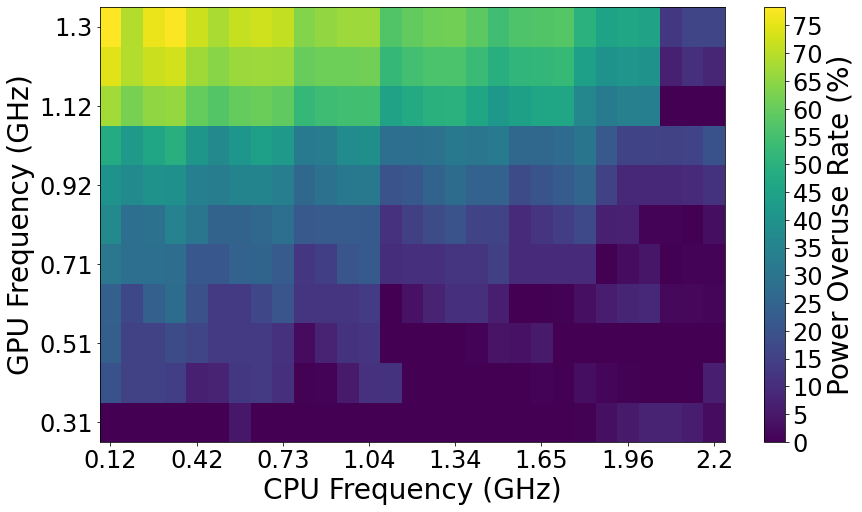

In [124]:
plot_heatmap_with_marker(efficiency_table_100, cpu_x_axis, gpu_x_axis, frontier_frequency_combination_dict, 'Power Overuse Rate vs Hardware Frequency', 'CPU Frequency (GHz)', 'GPU Frequency (GHz)', 'Power Overuse Rate (%)', 5)

In [125]:
# with open(('../assets/result/energy/Dict-Per-Real-Second-960.json'), 'w') as file:
#     json.dump(full_frontier_dict, file, indent=4)

In [126]:
# with open(('../assets/result/energy/Efficiency-Table-960.json'), 'w') as file:
#     json.dump(efficiency_table, file, indent=4)

In [127]:
def interpolate_2d_array(arr, new_shape):
    """
    Reshape a 2D array to a specific shape, retaining the edge values and 
    maintaining the trend for non-edge values.
    
    :param arr: 2D list of numbers
    :param new_shape: tuple of (new_rows, new_cols)
    :return: reshaped 2D list
    """
    arr = np.array(arr)
    orig_rows, orig_cols = arr.shape
    new_rows, new_cols = new_shape

    # Step 1: Interpolate rows
    intermediate_array = np.zeros((orig_rows, new_cols))
    for i in range(orig_rows):
            intermediate_array[i, :] = np.interp(np.linspace(0, orig_cols-1, new_cols), np.arange(orig_cols), arr[i, :])

    # Step 2: Interpolate columns
    new_array = np.zeros((new_rows, new_cols))
    for j in range(new_cols):
            new_array[:, j] = np.interp(np.linspace(0, orig_rows-1, new_rows), np.arange(orig_rows), intermediate_array[:, j])

    # Ensure edge values are exactly as in the original array
    new_array[0, :] = np.interp(np.linspace(0, orig_cols-1, new_cols), np.arange(orig_cols), arr[0, :])
    new_array[-1, :] = np.interp(np.linspace(0, orig_cols-1, new_cols), np.arange(orig_cols), arr[-1, :])
    new_array[:, 0] = np.interp(np.linspace(0, orig_rows-1, new_rows), np.arange(orig_rows), arr[:, 0])
    new_array[:, -1] = np.interp(np.linspace(0, orig_rows-1, new_rows), np.arange(orig_rows), arr[:, -1])

    return new_array.tolist()

In [128]:
CPU_FREQ = [
    115200, 192000, 268800, 345600, 422400, 499200, 576000, 652800, 729600,
    806400, 883200, 960000, 1036800, 1113600, 1190400, 1267200, 1344000,
    1420800, 1497600, 1574400, 1651200, 1728000, 1804800, 1881600, 1958400,
    2035200, 2112000, 2188800, 2201600
]

GPU_FREQ = [
    306000000, 408000000, 510000000, 612000000, 714000000, 816000000, 918000000,
    1020000000, 1122000000, 1224000000, 1300500000
]

# STANDARD_EFFICIENCY_TABLE_PATH = '../assets/result/optimizer_energy/Standard-Efficiency-Table.json'
# STANDARD_EFFICIENCY_TABLE = load_json(STANDARD_EFFICIENCY_TABLE_PATH)

STANDARD_EFFICIENCY_TABLE = interpolate_2d_array(efficiency_table_100, (10, 10))
real_efficiency_table = interpolate_2d_array(STANDARD_EFFICIENCY_TABLE, (len(GPU_FREQ), len(CPU_FREQ)))

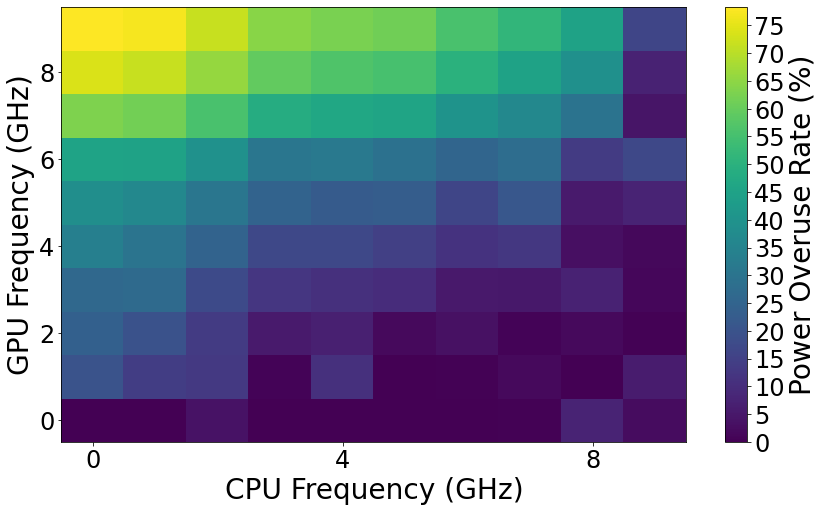

In [129]:
plot_heatmap_with_marker(STANDARD_EFFICIENCY_TABLE, range(10), range(10), frontier_frequency_combination_dict, 'Power Overuse Rate vs Hardware Frequency', 'CPU Frequency (GHz)', 'GPU Frequency (GHz)', 'Power Overuse Rate (%)', 5)

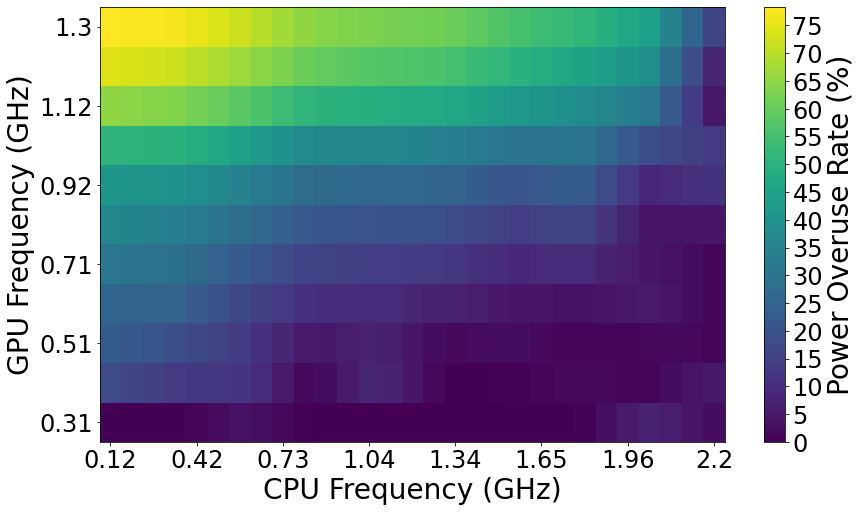

In [130]:
plot_heatmap_with_marker(real_efficiency_table, cpu_x_axis, gpu_x_axis, frontier_frequency_combination_dict, 'Power Overuse Rate vs Hardware Frequency', 'CPU Frequency (GHz)', 'GPU Frequency (GHz)', 'Power Overuse Rate (%)', 5)